In [16]:
from batchcreator import DataGenerator, get_list_IDs
from datetime import datetime
import tensorflow as tf
from model_builder import build_generator, GAN
import numpy as np

import matplotlib.pyplot as plt

In [2]:
batch_size = 8

# Create list of IDs to retrieve
x_seq_size=5
y_seq_size=1

start_dt = datetime(2019,6,1,0,0)
end_dt =  datetime(2019,6,8,0,0)
# Exclude samples were there is no rain in the input
filter_no_rain = True
list_IDs = get_list_IDs(start_dt, end_dt, x_seq_size, y_seq_size, filter_no_rain=filter_no_rain)
print(list_IDs[0])
print(len(list_IDs))

(['201905312335', '201905312340', '201905312345', '201905312350', '201905312355'], ['201906010000'])
404


In [3]:
# Test generator
generator = DataGenerator(list_IDs, batch_size=batch_size, x_seq_size=x_seq_size, 
                                       y_seq_size=y_seq_size, normalize_y=False)
for i in generator:
    x,y = i
    print(x.shape, y.shape)

(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)
(32, 5, 768, 700, 1) (32, 1, 384, 350, 1)


In [3]:
model = GAN()
model.compile()

In [5]:
generator = DataGenerator(list_IDs, batch_size=batch_size, x_seq_size=x_seq_size, 
                                       y_seq_size=y_seq_size, normalize_y=False)
hist = model.fit(generator, epochs=3)

Epoch 1/3
50/50 [==============================] - 6054s 121s/step - d_loss: 0.6385 - g_loss: 0.7887
Epoch 2/3
50/50 [==============================] - 6078s 121s/step - d_loss: 0.6652 - g_loss: 0.6625
Epoch 3/3
50/50 [==============================] - 6105s 122s/step - d_loss: 0.6621 - g_loss: 0.8691


In [6]:
model.save("gan_model")

INFO:tensorflow:Assets written to: gan_model/assets


In [7]:
model.generator.save("generator")

INFO:tensorflow:Assets written to: generator/assets


In [31]:
# Test generator
start_dt = datetime(2019,6,6,0,0)
end_dt =  datetime(2019,6,6,0,5)

list_IDs = get_list_IDs(start_dt, end_dt, x_seq_size, y_seq_size, filter_no_rain=filter_no_rain)
generator = DataGenerator(list_IDs, batch_size=1, x_seq_size=x_seq_size, 
                                       y_seq_size=y_seq_size, normalize_y=False)
for i in generator:
    x,y = i
    print(x.shape, y.shape)

(1, 5, 768, 700, 1) (1, 1, 384, 350, 1)


In [32]:
y_pred = model.generator(x)
y_pred.shape

TensorShape([1, 1, 384, 350, 1])

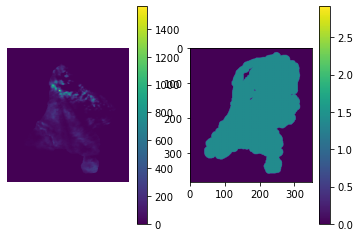

In [45]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.squeeze(y))
plt.colorbar()
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.squeeze(y_pred))
plt.colorbar()
plt.show()

(array([78661., 13933., 13932.,     0.,     0., 13938.,     0.,     0.,
            0., 13936.]),
 array([0.       , 0.2914844, 0.5829688, 0.8744531, 1.1659375, 1.4574219,
        1.7489063, 2.0403907, 2.331875 , 2.6233594, 2.9148438],
       dtype=float32),
 <a list of 10 Patch objects>)

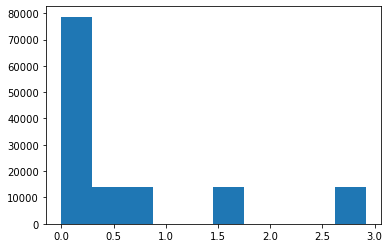

In [34]:
plt.hist(y_pred.numpy().flatten())

In [50]:
model.discriminator(y_pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6865262]], dtype=float32)>

In [56]:
# Run with only generator and mse loss:
batch_size = 32

# Create list of IDs to retrieve
x_seq_size=5
y_seq_size=1

start_dt = datetime(2019,1,1,0,0)
end_dt =  datetime(2019,12,31,23,55)
# Exclude samples were there is no rain in the input
filter_no_rain = True
list_IDs = get_list_IDs(start_dt, end_dt, x_seq_size, y_seq_size, filter_no_rain=filter_no_rain)
print(list_IDs[0])
print(len(list_IDs))

(['201901010320', '201901010325', '201901010330', '201901010335', '201901010340'], ['201901010345'])
20134


In [57]:
model = build_generator()
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
generator = DataGenerator(list_IDs, batch_size=batch_size, x_seq_size=x_seq_size, 
                                       y_seq_size=y_seq_size, normalize_y=False)
model.fit(generator, epochs=3)